In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns
from itertools import chain

In [2]:
df = pd.read_csv("data/marketing_campaign.csv", sep=";")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
condition = (df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']] == 1).sum(axis=1) >=2
df[condition]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
15,2114,1946,PhD,Single,82800.0,0,0,2012-11-24,23,1006,...,3,0,0,1,1,0,0,3,11,1
39,2968,1943,PhD,Divorced,48948.0,0,0,2013-02-01,53,437,...,6,1,0,0,0,0,0,3,11,1
53,2225,1977,Graduation,Divorced,82582.0,0,0,2014-06-07,54,510,...,1,1,0,0,1,0,0,3,11,1
55,6260,1955,Master,Together,82384.0,0,0,2012-11-19,55,984,...,1,0,0,1,0,0,0,3,11,1
60,6853,1982,Master,Single,75777.0,0,0,2013-07-04,12,712,...,1,0,1,1,0,0,0,3,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2175,1772,1975,PhD,Married,79174.0,0,0,2013-01-11,2,1074,...,2,0,0,1,1,0,0,3,11,1
2193,8722,1957,2n Cycle,Married,82347.0,0,0,2012-11-06,38,556,...,3,1,0,0,1,0,0,3,11,1
2194,7118,1957,Graduation,Married,73803.0,0,1,2012-08-01,61,833,...,6,1,0,0,0,0,0,3,11,1
2198,2632,1954,Graduation,Married,50501.0,1,1,2013-06-18,10,297,...,6,1,0,0,0,0,0,3,11,1


In [5]:
def list_campaigns(row):
    return [i for i, cmp in enumerate(row, start=1) if cmp == 1] or [0]

campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

df['AcceptedCampaigns'] = df[campaign_columns].apply(list_campaigns, axis=1)

In [6]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [7]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
AcceptedCampaigns       0
dtype: int64

In [8]:
df.dropna(inplace=True)
df.shape

(2216, 30)

In [9]:
# Finding the most recent customer checking their recency to estimate the latest recording of
# this dataset

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df.iloc[df['Dt_Customer'].idxmax()]['Recency']

18

In [10]:
reference_date = df['Dt_Customer'].max()
reference_date = reference_date + timedelta(days=18)

In [11]:
reference_year = reference_date.year
df['Age'] = reference_year - df['Year_Birth']
df['Customer_Since_Days'] = (reference_date - df['Dt_Customer']).dt.days
df[['Age', 'Customer_Since_Days']].head()

,Age,Customer_Since_Days
0,57,681
1,60,131
2,49,330
3,30,157
4,33,179


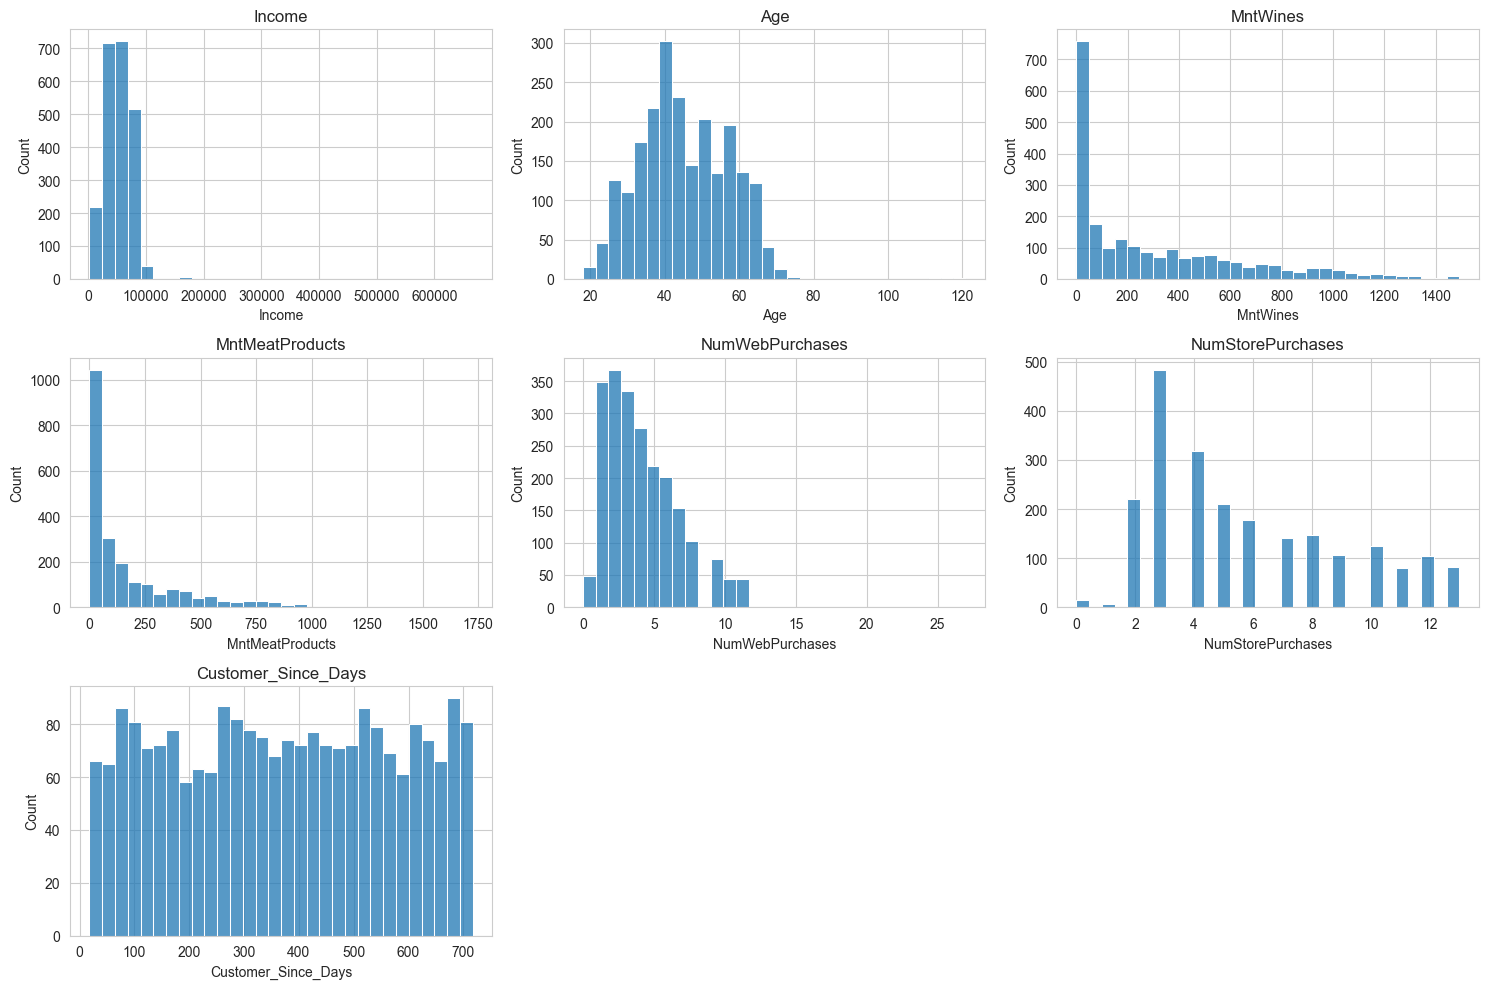

In [12]:
sns.set_style("whitegrid")

# Plotting histograms for some key numerical variables
key_numerical_vars = ['Income', 'Age', 'MntWines', 'MntMeatProducts', 'NumWebPurchases', 'NumStorePurchases', 'Customer_Since_Days']
plt.figure(figsize=(15, 10))

for i, var in enumerate(key_numerical_vars):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[var], kde=False, bins=30)
    plt.title(var)

plt.tight_layout()
plt.show()

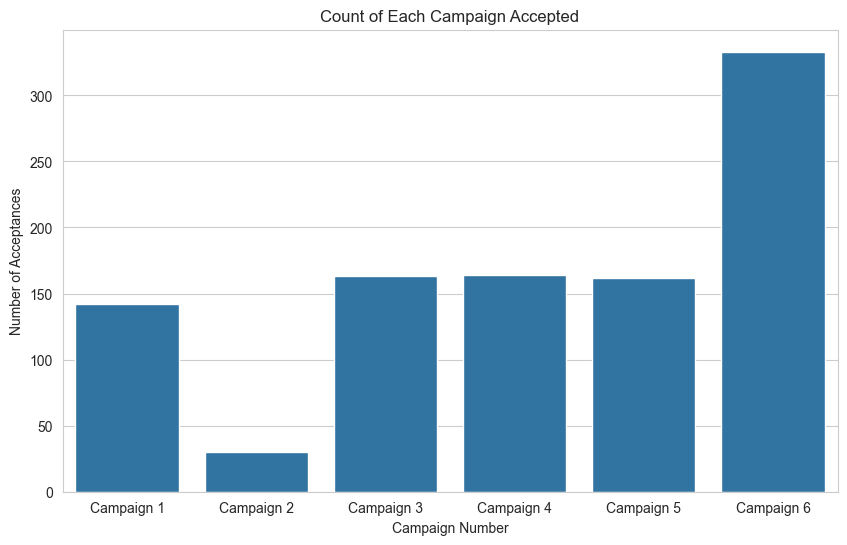

In [13]:
# Flatten the list of accepted campaigns into one long list
all_accepted_campaigns = list(chain.from_iterable(df['AcceptedCampaigns']))

# Remove zeros (indicating no campaign accepted)
all_accepted_campaigns = [x for x in all_accepted_campaigns if x != 0]

campaigns_df = pd.DataFrame(all_accepted_campaigns, columns=['Campaign'])

# Plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Campaign', data=campaigns_df)
plt.title('Count of Each Campaign Accepted')
plt.xlabel('Campaign Number')
plt.ylabel('Number of Acceptances')
plt.xticks(range(6), ['Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5', 'Campaign 6'])
plt.show()

In [14]:
# Creating the derived attributes

# 1. Customer Age Group
df['AgeGroup'] = pd.cut(df['Age'], bins=[17, 35, 65, 75, 125], labels=['YoungAdult', 'MiddleAged', 'Senior', 'Elderly'], right=True)

# 2. Total Spending
df['TotalSpending'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# 3. Customer Lifetime Value (CLV)
df['CLV'] = df['TotalSpending'] * df['Customer_Since_Days']

# 4. Family Size
df['FamilySize'] = df['Kidhome'] + df['Teenhome']

# 5. Income Bracket - using quantiles
df['IncomeBracket'] = pd.qcut(df['Income'], q=4, labels=['Low', 'Medium', 'High', 'VeryHigh'])

# 6. Recency Categories
df['RecencyCategory'] = pd.cut(df['Recency'], bins=[0, 30, 60, 90, 1000], labels=['Recent', 'Moderate', 'Old', 'VeryOld'], right=False)

df[['AgeGroup', 'TotalSpending', 'CLV', 'FamilySize', 'IncomeBracket', 'RecencyCategory']].head()

,AgeGroup,TotalSpending,CLV,FamilySize,IncomeBracket,RecencyCategory
0,MiddleAged,1617,1101177,0,High,Moderate
1,MiddleAged,27,3537,2,Medium,Moderate
2,MiddleAged,776,256080,0,VeryHigh,Recent
3,YoungAdult,53,8321,1,Low,Recent
4,YoungAdult,422,75538,1,High,VeryOld


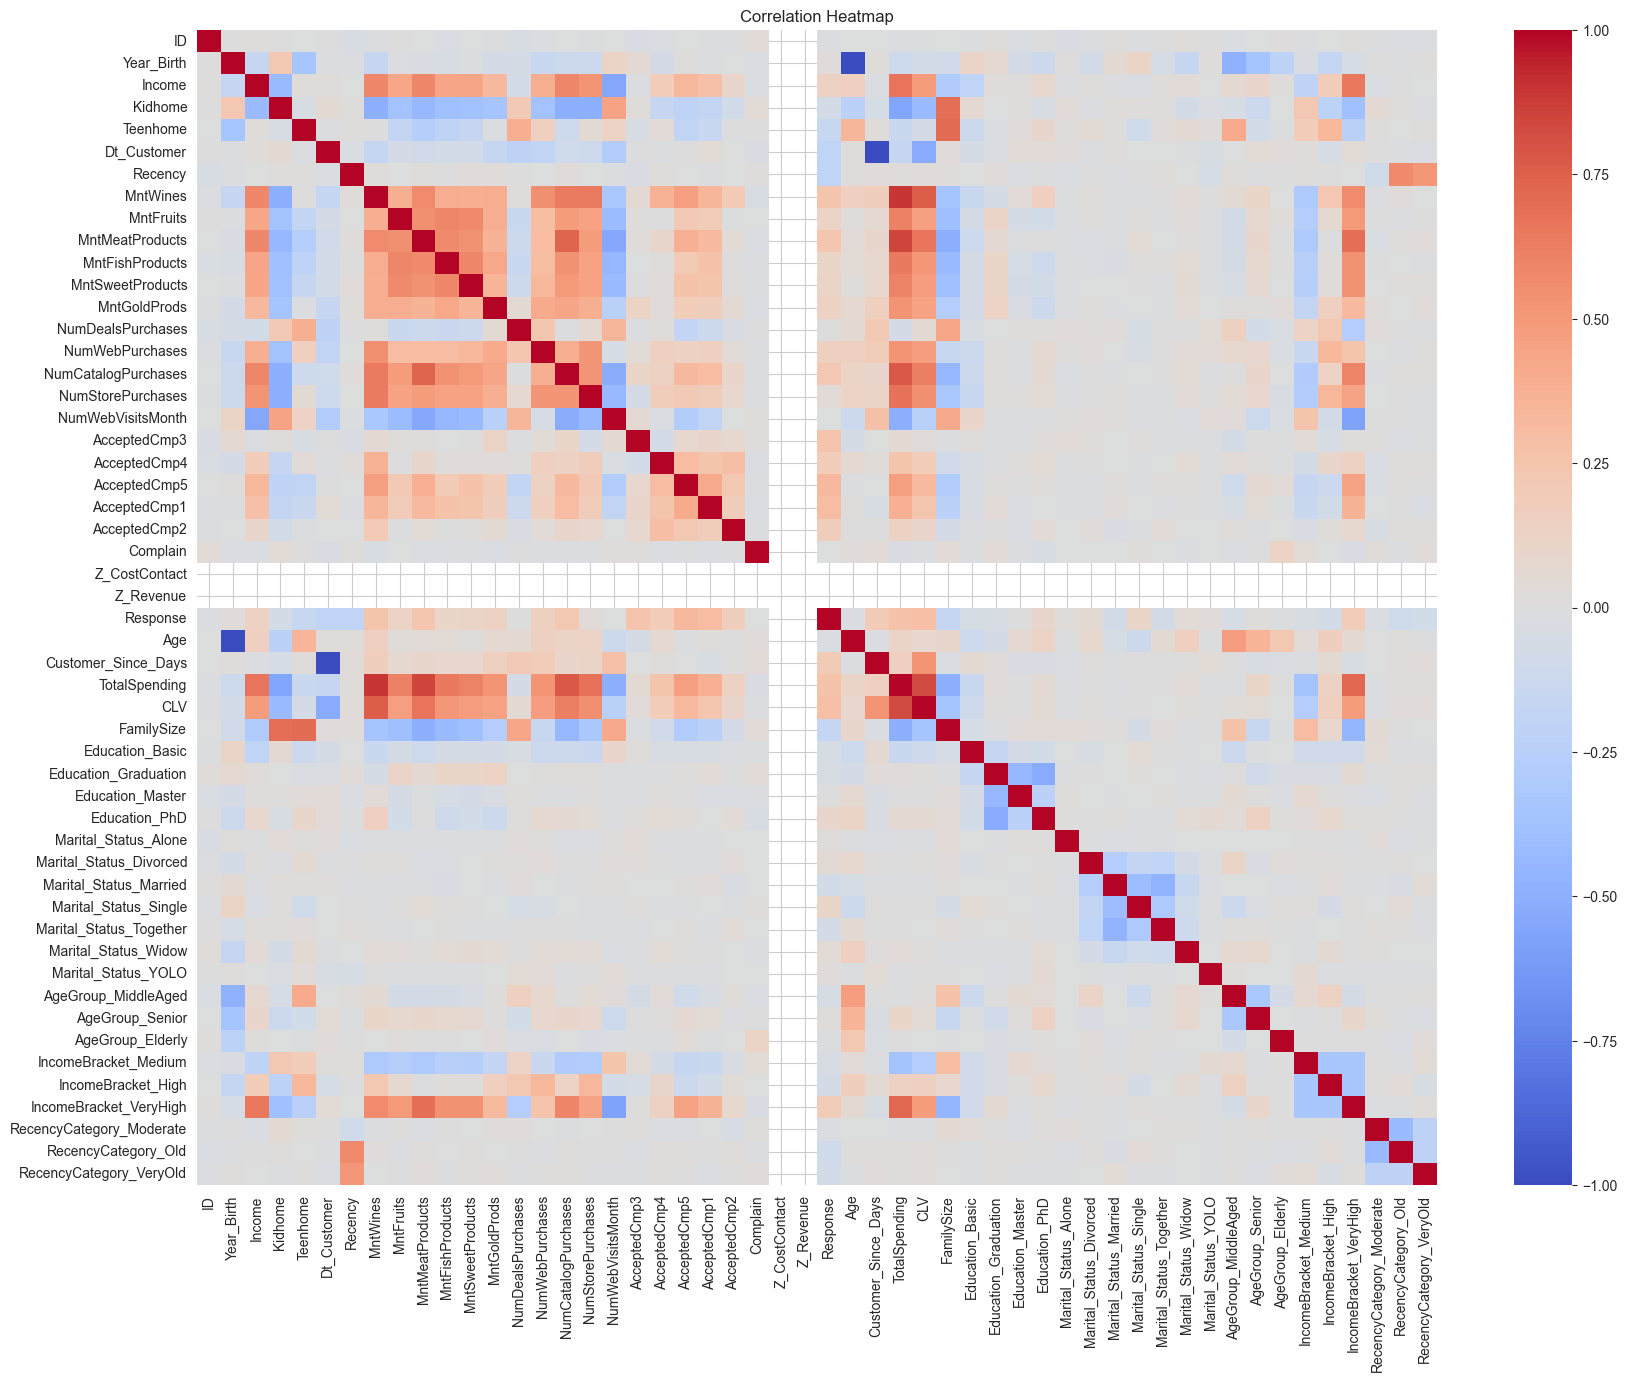

In [15]:
# drop first true to avoid multicolinearity
corr_df = pd.get_dummies(df, columns=['Education', 'Marital_Status', 'AgeGroup', 'IncomeBracket', 'RecencyCategory'], drop_first=True)
corr_df = corr_df.drop(['AcceptedCampaigns'], axis=1)
# Correlation heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr_df.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [16]:
df['NumAcceptedCampaigns'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].sum(axis=1)

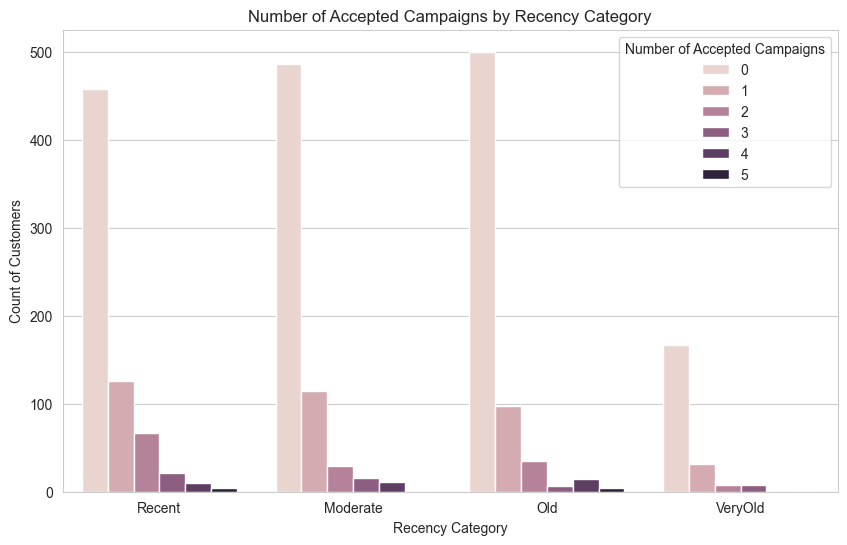

In [17]:
# Age vs. AcceptedCampaign
plt.figure(figsize=(10,6))
sns.countplot(x='RecencyCategory', hue='NumAcceptedCampaigns', data=df)
plt.title('Number of Accepted Campaigns by Recency Category')
plt.xlabel('Recency Category')
plt.ylabel('Count of Customers')
plt.legend(title='Number of Accepted Campaigns')
plt.show()

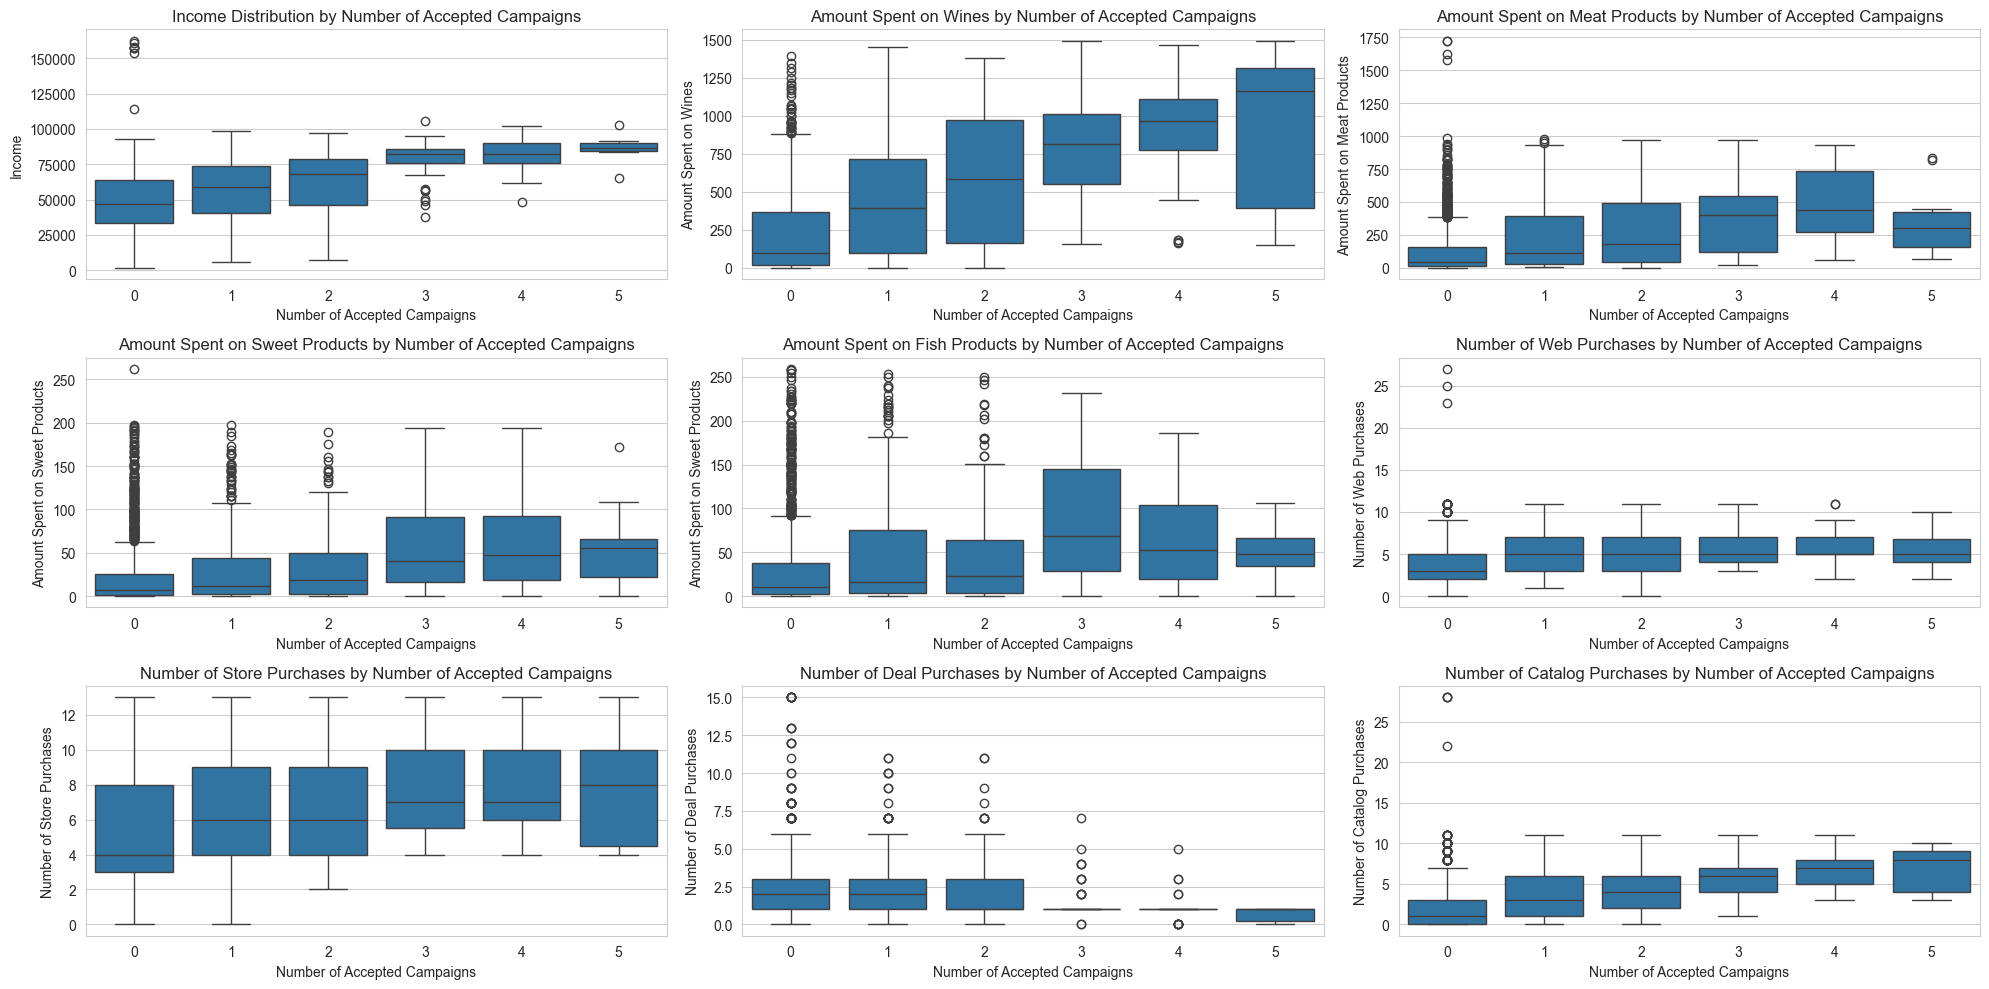

In [18]:
plt.figure(figsize=(20, 10))

# Box Plot for Income against NumAcceptedCampaigns
plt.subplot(3, 3, 1)
sns.boxplot(x='NumAcceptedCampaigns', y='Income', data=df[df['Income']<=200000])
plt.title('Income Distribution by Number of Accepted Campaigns')
plt.xlabel('Number of Accepted Campaigns')
plt.ylabel('Income')

# Box Plot for MntWines against NumAcceptedCampaigns
plt.subplot(3,3,2)
sns.boxplot(x='NumAcceptedCampaigns', y='MntWines', data=df)
plt.title('Amount Spent on Wines by Number of Accepted Campaigns')
plt.xlabel('Number of Accepted Campaigns')
plt.ylabel('Amount Spent on Wines')

plt.subplot(3,3,3)
sns.boxplot(x='NumAcceptedCampaigns', y='MntMeatProducts', data=df)
plt.title('Amount Spent on Meat Products by Number of Accepted Campaigns')
plt.xlabel('Number of Accepted Campaigns')
plt.ylabel('Amount Spent on Meat Products')

plt.subplot(3,3,4)
sns.boxplot(x='NumAcceptedCampaigns', y='MntSweetProducts', data=df)
plt.title('Amount Spent on Sweet Products by Number of Accepted Campaigns')
plt.xlabel('Number of Accepted Campaigns')
plt.ylabel('Amount Spent on Sweet Products')

plt.subplot(3,3,5)
sns.boxplot(x='NumAcceptedCampaigns', y='MntFishProducts', data=df)
plt.title('Amount Spent on Fish Products by Number of Accepted Campaigns')
plt.xlabel('Number of Accepted Campaigns')
plt.ylabel('Amount Spent on Sweet Products')

plt.subplot(3,3,6)
sns.boxplot(x='NumAcceptedCampaigns', y='NumWebPurchases', data=df)
plt.title('Number of Web Purchases by Number of Accepted Campaigns')
plt.xlabel('Number of Accepted Campaigns')
plt.ylabel('Number of Web Purchases')

plt.subplot(3,3,7)
sns.boxplot(x='NumAcceptedCampaigns', y='NumStorePurchases', data=df)
plt.title('Number of Store Purchases by Number of Accepted Campaigns')
plt.xlabel('Number of Accepted Campaigns')
plt.ylabel('Number of Store Purchases')

plt.subplot(3,3,8)
sns.boxplot(x='NumAcceptedCampaigns', y='NumDealsPurchases', data=df)
plt.title('Number of Deal Purchases by Number of Accepted Campaigns')
plt.xlabel('Number of Accepted Campaigns')
plt.ylabel('Number of Deal Purchases')

plt.subplot(3,3,9)
sns.boxplot(x='NumAcceptedCampaigns', y='NumCatalogPurchases', data=df)
plt.title('Number of Catalog Purchases by Number of Accepted Campaigns')
plt.xlabel('Number of Accepted Campaigns')
plt.ylabel('Number of Catalog Purchases')

plt.tight_layout()
plt.show()

In [19]:
def make_long_format(column:str, data:pd.DataFrame):
    long_format_data = pd.DataFrame()
    data = data.rename(columns={"Response": "AcceptedCmp6"})

    # Loop through each campaign column to create rows for accepted campaigns
    for i in range(1, 6):
        campaign_col = 'AcceptedCmp' + str(i)
        temp = data[data[campaign_col] == 1][[column, campaign_col]]
        temp['AcceptedCampaign'] = i
        long_format_data = pd.concat([long_format_data, temp[[column, 'AcceptedCampaign']]])

    return long_format_data

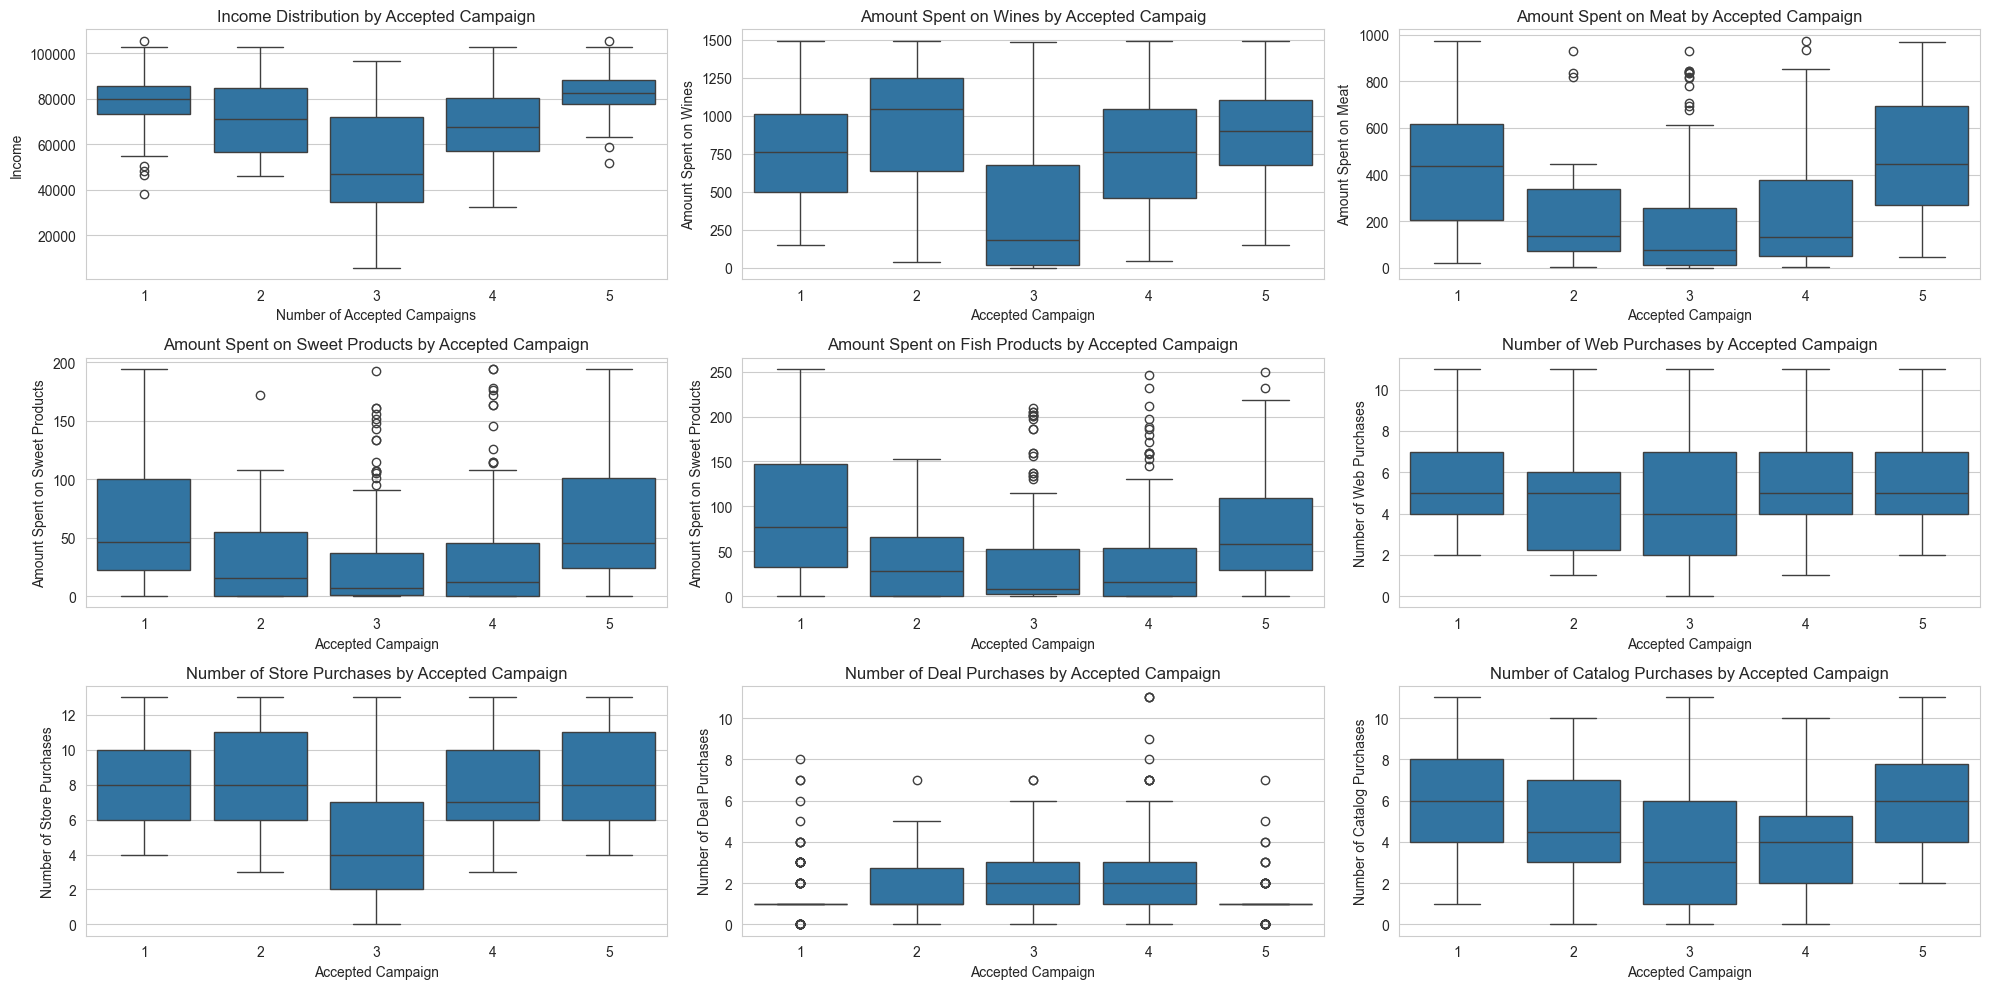

In [20]:
plt.figure(figsize=(20, 10))

# Box Plot for Income against NumAcceptedCampaigns
plt.subplot(3, 3, 1)
sns.boxplot(x='AcceptedCampaign', y='Income', data=make_long_format('Income', df[df['Income']<=200000]))
plt.title('Income Distribution by Accepted Campaign')
plt.xlabel('Number of Accepted Campaigns')
plt.ylabel('Income')

plt.subplot(3,3,2)
sns.boxplot(x='AcceptedCampaign', y='MntWines', data=make_long_format('MntWines', df))
plt.title('Amount Spent on Wines by Accepted Campaig')
plt.xlabel('Accepted Campaign')
plt.ylabel('Amount Spent on Wines')

plt.subplot(3,3,3)
sns.boxplot(x='AcceptedCampaign', y='MntMeatProducts', data=make_long_format('MntMeatProducts', df))
plt.title('Amount Spent on Meat by Accepted Campaign')
plt.xlabel('Accepted Campaign')
plt.ylabel('Amount Spent on Meat')

plt.subplot(3,3,4)
sns.boxplot(x='AcceptedCampaign', y='MntSweetProducts', data=make_long_format('MntSweetProducts', df))
plt.title('Amount Spent on Sweet Products by Accepted Campaign')
plt.xlabel('Accepted Campaign')
plt.ylabel('Amount Spent on Sweet Products')

plt.subplot(3,3,5)
sns.boxplot(x='AcceptedCampaign', y='MntFishProducts', data=make_long_format('MntFishProducts', df))
plt.title('Amount Spent on Fish Products by Accepted Campaign')
plt.xlabel('Accepted Campaign')
plt.ylabel('Amount Spent on Sweet Products')

plt.subplot(3,3,6)
sns.boxplot(x='AcceptedCampaign', y='NumWebPurchases', data=make_long_format('NumWebPurchases', df))
plt.title('Number of Web Purchases by Accepted Campaign')
plt.xlabel('Accepted Campaign')
plt.ylabel('Number of Web Purchases')

plt.subplot(3,3,7)
sns.boxplot(x='AcceptedCampaign', y='NumStorePurchases', data=make_long_format('NumStorePurchases', df))
plt.title('Number of Store Purchases by Accepted Campaign')
plt.xlabel('Accepted Campaign')
plt.ylabel('Number of Store Purchases')

plt.subplot(3,3,8)
sns.boxplot(x='AcceptedCampaign', y='NumDealsPurchases', data=make_long_format('NumDealsPurchases', df))
plt.title('Number of Deal Purchases by Accepted Campaign')
plt.xlabel('Accepted Campaign')
plt.ylabel('Number of Deal Purchases')

plt.subplot(3,3,9)
sns.boxplot(x='AcceptedCampaign', y='NumCatalogPurchases', data=make_long_format('NumCatalogPurchases', df))
plt.title('Number of Catalog Purchases by Accepted Campaign')
plt.xlabel('Accepted Campaign')
plt.ylabel('Number of Catalog Purchases')

plt.tight_layout()
plt.show()

## More Rigorous Cleaning

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ID                    2216 non-null   int64         
 1   Year_Birth            2216 non-null   int64         
 2   Education             2216 non-null   object        
 3   Marital_Status        2216 non-null   object        
 4   Income                2216 non-null   float64       
 5   Kidhome               2216 non-null   int64         
 6   Teenhome              2216 non-null   int64         
 7   Dt_Customer           2216 non-null   datetime64[ns]
 8   Recency               2216 non-null   int64         
 9   MntWines              2216 non-null   int64         
 10  MntFruits             2216 non-null   int64         
 11  MntMeatProducts       2216 non-null   int64         
 12  MntFishProducts       2216 non-null   int64         
 13  MntSweetProducts      2

In [22]:
df.rename(columns={'Response': 'AcceptedCmp6'}, inplace=True)

In [24]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Complain,Z_CostContact,Z_Revenue,AcceptedCmp6,Age,Customer_Since_Days,TotalSpending,CLV,FamilySize,NumAcceptedCampaigns
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.0,2216.0,2216.000000,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,2013-07-10 11:29:27.509025280,49.012635,305.091606,26.356047,166.995939,...,0.009477,3.0,11.0,0.150271,45.179603,371.521209,607.075361,2.448867e+05,0.947202,0.448556
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,3.0,11.0,0.000000,18.000000,18.000000,5.000000,1.500000e+02,0.000000,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,24.000000,2.000000,16.000000,...,0.000000,3.0,11.0,0.000000,37.000000,198.000000,69.000000,1.973700e+04,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,174.500000,8.000000,68.000000,...,0.000000,3.0,11.0,0.000000,44.000000,373.500000,396.500000,1.033720e+05,1.000000,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,2013-12-31 00:00:00,74.000000,505.000000,33.000000,232.250000,...,0.000000,3.0,11.0,0.000000,55.000000,547.000000,1048.000000,3.677138e+05,1.000000,1.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,1.000000,3.0,11.0,1.000000,121.000000,717.000000,2525.000000,1.549968e+06,3.000000,5.000000
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,NaN,28.948352,337.327920,39.793917,224.283273,...,0.096907,0.0,0.0,0.357417,11.985554,202.434667,602.900476,3.076607e+05,0.749062,0.892440


In [25]:
print("Unique Values for Education", df['Education'].unique())
print("Unique Values for Marital Starus", df['Marital_Status'].unique())

Unique Values for Education ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Unique Values for Marital Starus ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


2n cycle and Master are the same thing so we replace 2n cycle with Master
Also Alone will be replaced with Single in Marital Status

In [26]:
df["Education"].replace("2n Cycle", "Master", inplace=True)
df["Marital_Status"].replace("Alone", "Single", inplace=True)

Possible noise in YOLO and Absurd columns, let's investigate

In [27]:
df[df['Marital_Status'].isin(['YOLO', 'Absurd'])]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCampaigns,Age,Customer_Since_Days,AgeGroup,TotalSpending,CLV,FamilySize,IncomeBracket,RecencyCategory,NumAcceptedCampaigns
2093,7734,1993,Graduation,Absurd,79244.0,0,0,2012-12-19,58,471,...,"[1, 5, 6]",21,575,YoungAdult,1216,699200,0,VeryHigh,Moderate,3
2134,4369,1957,Master,Absurd,65487.0,0,0,2014-01-10,48,240,...,[0],57,188,MiddleAged,1169,219772,0,High,Moderate,0
2177,492,1973,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,...,[0],41,637,MiddleAged,424,270088,1,Medium,Recent,0
2202,11133,1973,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,...,[6],41,637,MiddleAged,424,270088,1,Medium,Recent,1


Rows look regular so we just group these categories under Other

In [28]:
df['Marital_Status'].replace(["Absurd", "YOLO"], "Others", inplace=True)

Previously we saw Income and Age had some discrepancies in their distributions. Let's have a look again

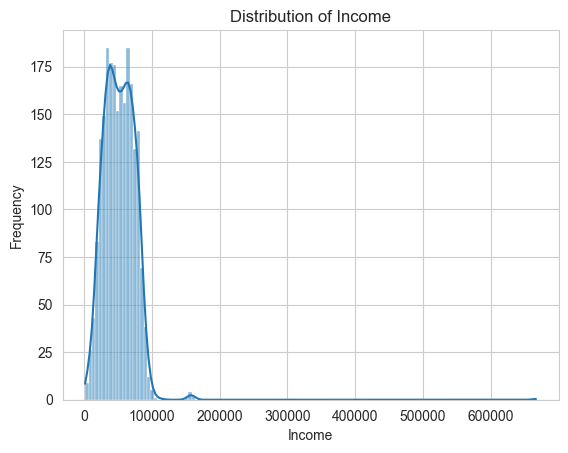

In [29]:
sns.histplot(df['Income'], kde=True)
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

Looks like income has some extreme outliers. Let's have a closer look

In [30]:
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [33]:
df[df['Income'] > upper_bound]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCampaigns,Age,Customer_Since_Days,AgeGroup,TotalSpending,CLV,FamilySize,IncomeBracket,RecencyCategory,NumAcceptedCampaigns
164,8475,1973,PhD,Married,157243.0,0,1,2014-03-01,98,20,...,[0],41,138,MiddleAged,1608,221904,1,VeryHigh,VeryOld,0
617,1503,1976,PhD,Together,162397.0,1,1,2013-06-03,31,85,...,[0],38,409,MiddleAged,107,43763,2,VeryHigh,Moderate,0
655,5555,1975,Graduation,Divorced,153924.0,0,0,2014-02-07,81,1,...,[0],39,160,MiddleAged,6,960,0,VeryHigh,Old,0
687,1501,1982,PhD,Married,160803.0,0,0,2012-08-04,21,55,...,[0],32,712,YoungAdult,1717,1222504,0,VeryHigh,Recent,0
1300,5336,1971,Master,Together,157733.0,1,0,2013-06-04,37,39,...,[0],43,408,MiddleAged,59,24072,1,VeryHigh,Moderate,0
1653,4931,1977,Graduation,Together,157146.0,0,0,2013-04-29,13,1,...,[0],37,444,MiddleAged,1730,768120,0,VeryHigh,Recent,0
2132,11181,1949,PhD,Married,156924.0,0,0,2013-08-29,85,2,...,[0],65,322,MiddleAged,8,2576,0,VeryHigh,Old,0
2233,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,...,[0],37,410,MiddleAged,62,25420,1,VeryHigh,Recent,0


In [35]:
df[df.Income>upper_bound].describe().T

,count,mean,min,25%,50%,75%,max,std
ID,8.0,5989.25,1501.0,4074.0,5445.5,8714.25,11181.0,3525.251308
Year_Birth,8.0,1972.5,1949.0,1972.5,1975.5,1977.0,1982.0,10.028531
Income,8.0,221604.5,153924.0,157090.5,157488.0,161201.5,666666.0,179850.404431
Kidhome,8.0,0.375,0.0,0.0,0.0,1.0,1.0,0.517549
Teenhome,8.0,0.25,0.0,0.0,0.0,0.25,1.0,0.46291
Dt_Customer,8,2013-07-06 15:00:00,2012-08-04 00:00:00,2013-05-24 12:00:00,2013-06-03 12:00:00,2013-10-08 12:00:00,2014-03-01 00:00:00,NaN
Recency,8.0,48.625,13.0,22.5,34.0,82.0,98.0,33.687376
MntWines,8.0,26.5,1.0,1.75,14.5,43.0,85.0,30.798887
MntFruits,8.0,4.5,0.0,1.0,1.0,5.0,16.0,6.524678
MntMeatProducts,8.0,621.875,1.0,7.25,17.0,1592.0,1725.0,846.511402


In [36]:
df[df.Income<upper_bound].describe().T

,count,mean,min,25%,50%,75%,max,std
ID,2208.0,5586.900815,0.0,2814.75,5458.5,8418.5,11191.0,3249.110303
Year_Birth,2208.0,1968.807065,1893.0,1959.0,1970.0,1977.0,1996.0,11.991913
Income,2208.0,51633.638134,1730.0,35196.0,51301.0,68289.75,113734.0,20713.37653
Kidhome,2208.0,0.442029,0.0,0.0,0.0,1.0,2.0,0.537063
Teenhome,2208.0,0.506341,0.0,0.0,0.0,1.0,2.0,0.544325
Dt_Customer,2208,2013-07-10 11:49:33.913043456,2012-07-30 00:00:00,2013-01-16 00:00:00,2013-07-09 00:00:00,2013-12-31 00:00:00,2014-06-29 00:00:00,NaN
Recency,2208.0,49.01404,0.0,24.0,49.0,74.0,99.0,28.938638
MntWines,2208.0,306.100996,0.0,24.0,177.5,507.0,1493.0,337.51627
MntFruits,2208.0,26.435236,0.0,2.0,8.0,33.0,199.0,39.842478
MntMeatProducts,2208.0,165.347826,0.0,16.0,68.0,232.0,1725.0,217.852649


5 of the outliers have purchased less than the mean amount of purchase (TotalSpending) so we can drop them since they do not add further importance for modelling and analysis

In [37]:
ids_to_drop_high_income = [1503, 5555, 5336, 11181, 9432]
df.drop(df[df['ID'].isin(ids_to_drop_high_income)].index, inplace=True)

Checking the Income Distribution Again

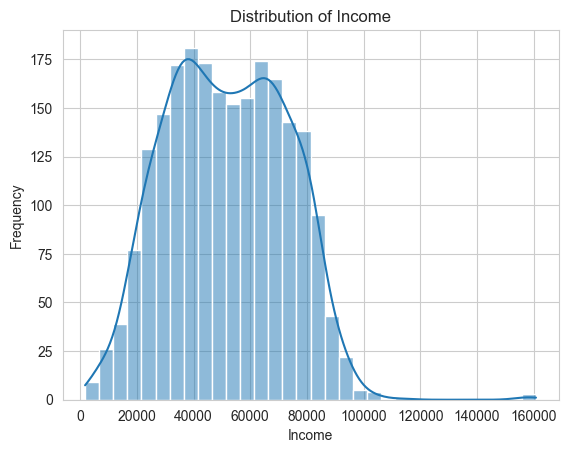

In [38]:
sns.histplot(df['Income'], kde=True)
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

This looks more justifiable now, let's also check age

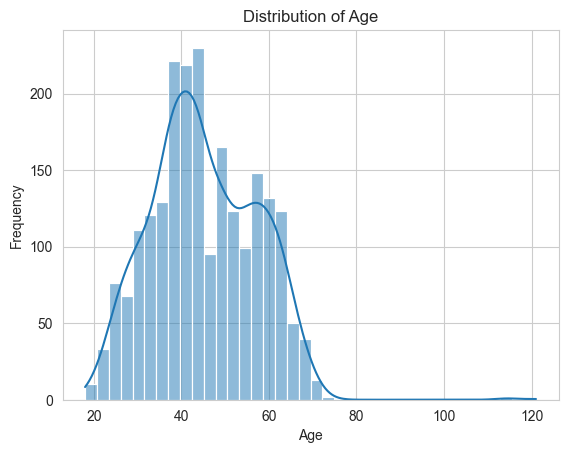

In [40]:
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

There also seems to be an outlier here which could possibly be a misentry

In [42]:
df[df['Age'] > 80]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCampaigns,Age,Customer_Since_Days,AgeGroup,TotalSpending,CLV,FamilySize,IncomeBracket,RecencyCategory,NumAcceptedCampaigns
192,7829,1900,Master,Divorced,36640.0,1,0,2013-09-26,99,15,...,[0],114,294,Elderly,65,19110,1,Medium,VeryOld,0
239,11004,1893,Master,Single,60182.0,0,1,2014-05-17,23,8,...,[0],121,61,Elderly,22,1342,1,High,Recent,0
339,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,...,[5],115,294,Elderly,1853,544782,0,VeryHigh,Moderate,1


We might leave these instances since they do not look too irregular apart from the age

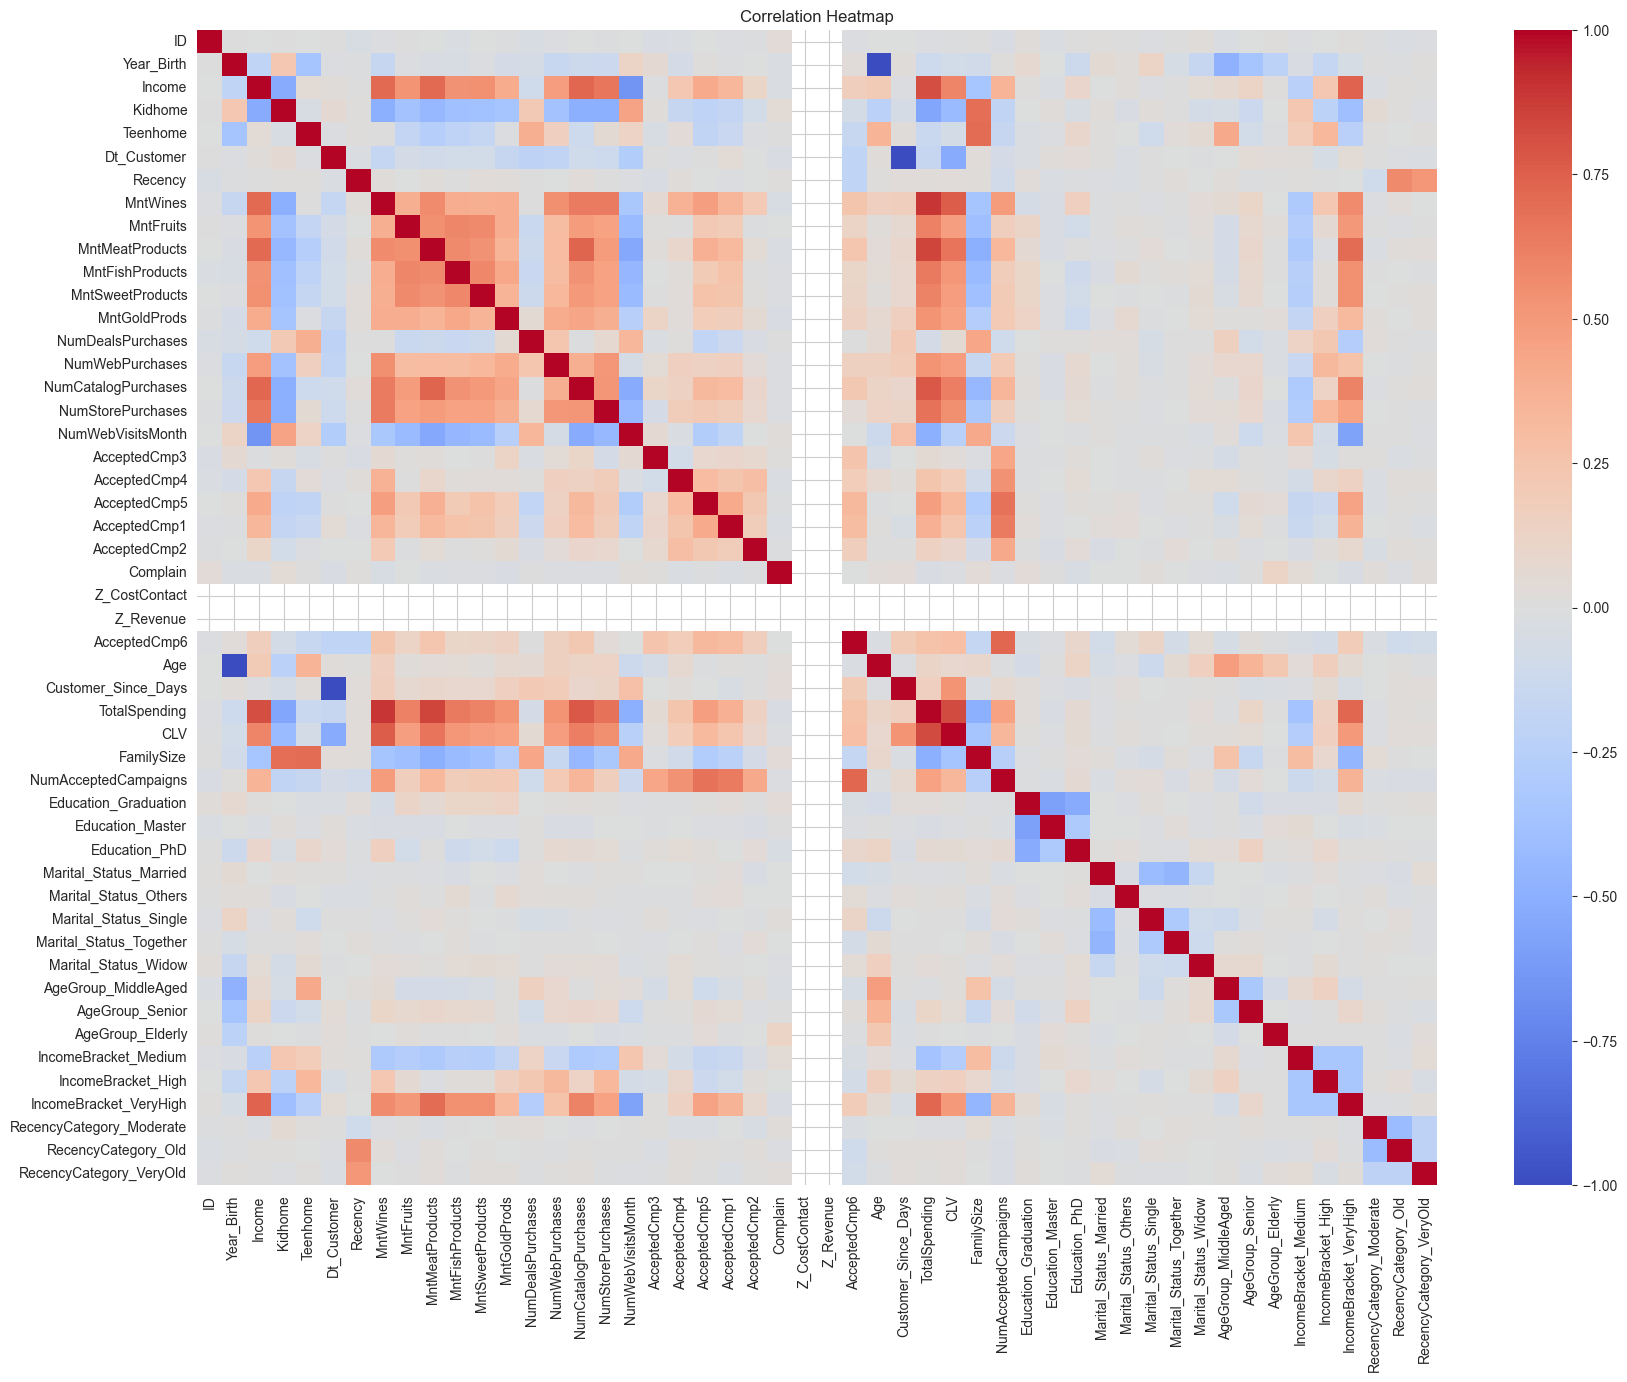

In [43]:
# drop first true to avoid multicolinearity
corr_df = pd.get_dummies(df, columns=['Education', 'Marital_Status', 'AgeGroup', 'IncomeBracket', 'RecencyCategory'], drop_first=True)
corr_df = corr_df.drop(['AcceptedCampaigns'], axis=1)
# Correlation heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr_df.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [44]:
df.to_csv("./data/marketing_campaign_engineered.csv", index=False)